In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [10]:
# Load dataset
df = pd.read_csv('canada_tech_jobs.csv')

In [11]:
# Preview data
print(df.head())

                   Job Title             Skills Mentioned   Location  \
0               Data Analyst           Python, SQL, Excel    Toronto   
1            Cloud Developer     AWS, JavaScript, Node.js  Vancouver   
2            DevOps Engineer  Docker, Kubernetes, Jenkins    Toronto   
3       Full Stack Developer   JavaScript, React, Node.js   Montreal   
4  Machine Learning Engineer      Python, TensorFlow, SQL    Calgary   

  Posted Date  
0  2025-06-20  
1  2025-06-21  
2  2025-06-22  
3  2025-06-21  
4  2025-06-23  


In [12]:
# Extract all skills into a list
all_skills = df['Skills Mentioned'].str.split(', ').sum()

In [13]:
# Count frequency of each skill
skill_counts = Counter(all_skills)

In [14]:
# Convert to DataFrame for easy plotting
skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])
skill_df = skill_df.sort_values(by='Count', ascending=False)

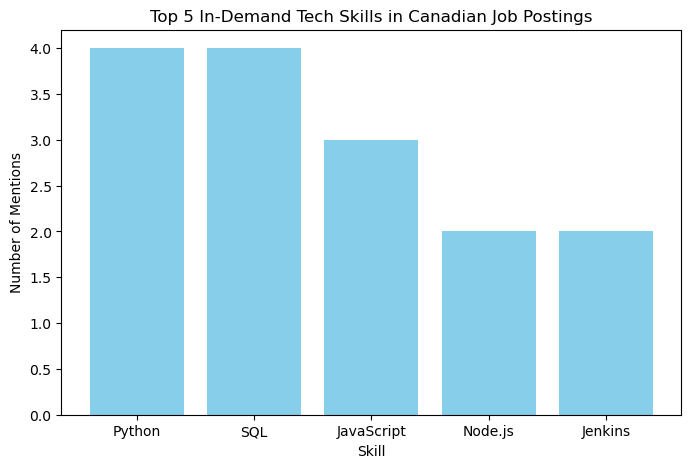

In [15]:
# Top 5 skills bar chart
top5 = skill_df.head(5)
plt.figure(figsize=(8,5))
plt.bar(top5['Skill'], top5['Count'], color='skyblue')
plt.title('Top 5 In-Demand Tech Skills in Canadian Job Postings')
plt.xlabel('Skill')
plt.ylabel('Number of Mentions')
plt.show()

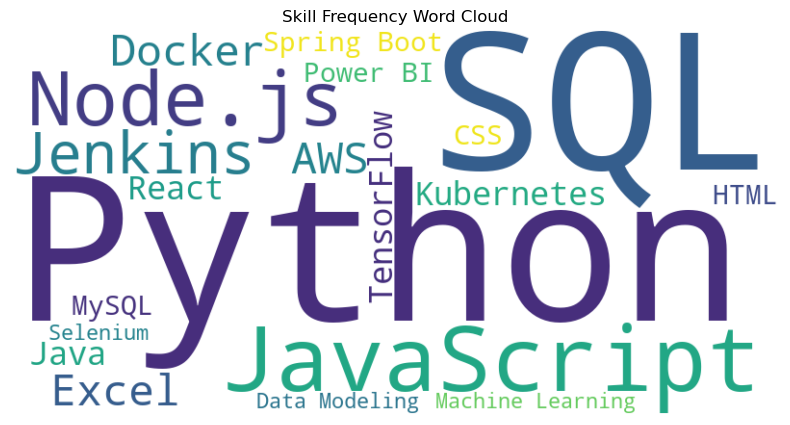

In [16]:
# Word Cloud of skills
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(skill_counts)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Skill Frequency Word Cloud')
plt.show()

### 🔍 Insights Summary: Top Tech Skills in Canadian Job Postings

### Tech Skills by Frequency

After analyzing a sample of recent tech job postings in Canada, the most frequently requested skills are:

- **Python**: Dominant across data science, backend, and automation roles.
- **SQL**: Essential for data analytics and business intelligence roles.
- **JavaScript (React, Node.js)**: Crucial for web and full-stack development.
- **AWS & Cloud**: Rapid growth in cloud-based infrastructure has made cloud skills a top priority.
- **Docker & Kubernetes**: Increasing demand in DevOps and deployment pipelines.

This analysis provides practical insights for job seekers, educators, and recruiters by highlighting the technologies driving hiring trends in 2025.


In [25]:
import pandas as pd

# Load the CSV file (update path if needed)
df = pd.read_csv('canada_tech_jobs.csv')  # Replace with actual filename

# Convert 'Skills Mentioned' from comma-separated strings to list of skills
df['Skills Mentioned'] = df['Skills Mentioned'].apply(lambda x: [skill.strip() for skill in x.split(',')])

# Verify
print(df.head())

                   Job Title               Skills Mentioned   Location  \
0               Data Analyst           [Python, SQL, Excel]    Toronto   
1            Cloud Developer     [AWS, JavaScript, Node.js]  Vancouver   
2            DevOps Engineer  [Docker, Kubernetes, Jenkins]    Toronto   
3       Full Stack Developer   [JavaScript, React, Node.js]   Montreal   
4  Machine Learning Engineer      [Python, TensorFlow, SQL]    Calgary   

  Posted Date  
0  2025-06-20  
1  2025-06-21  
2  2025-06-22  
3  2025-06-21  
4  2025-06-23  


In [26]:
all_skills = set()
df['Skills Mentioned'].apply(lambda skills: all_skills.update(skills))

for skill in all_skills:
    df[skill] = df['Skills Mentioned'].apply(lambda skills: 1 if skill in skills else 0)

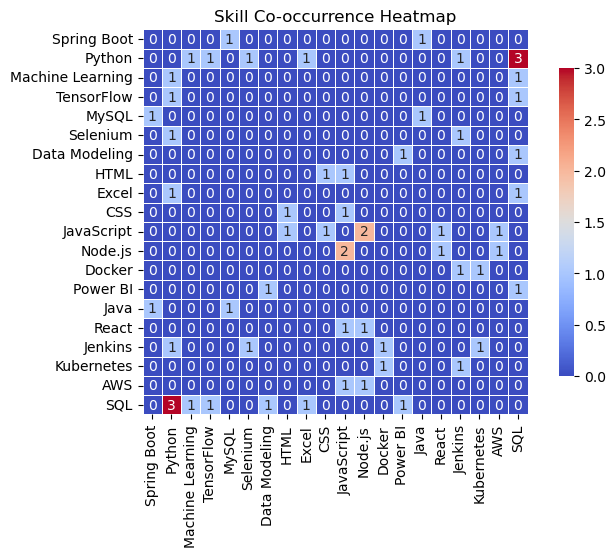

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

skill_cols = list(all_skills)
skill_matrix = df[skill_cols]

co_occurrence = skill_matrix.T.dot(skill_matrix)
np.fill_diagonal(co_occurrence.values, 0)

plt.figure(figsize=(8,5))
sns.heatmap(co_occurrence, cmap='coolwarm', annot=True, fmt='d', square=True,
            cbar_kws={"shrink": .8}, linewidths=.5)
plt.title('Skill Co-occurrence Heatmap')
plt.show()

### Skill Co-occurrence Analysis

To dig a bit deeper, the project explored which skills often appear together in job postings. A co-occurrence heatmap was created by turning the skill data into a binary matrix and analyzing patterns across different roles.

Some common skill combinations that stood out:

**Python + SQL**: A go-to pair in analytics and data science.

**AWS + Docker**: Often found together in DevOps and cloud-focused roles.

**JavaScript + React + Node.js**: A popular stack for frontend and full-stack development.

**Jenkins + Selenium**: Commonly used in automation and QA workflows.

Spotting these patterns can help professionals plan smarter learning paths and help employers identify skills that naturally work well together when hiring.

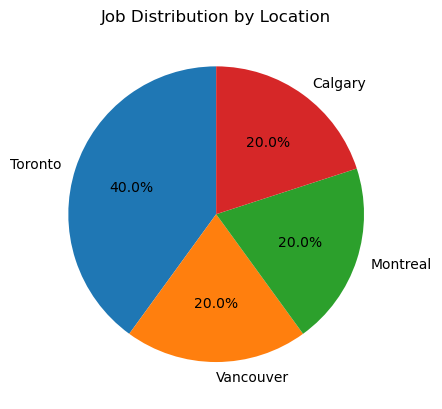

In [34]:
import matplotlib.pyplot as plt

# Jobs count by location
location_counts = df['Location'].value_counts()

# Plot pie chart -– Jobs by Location
location_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Job Distribution by Location")
plt.ylabel('')
plt.show()

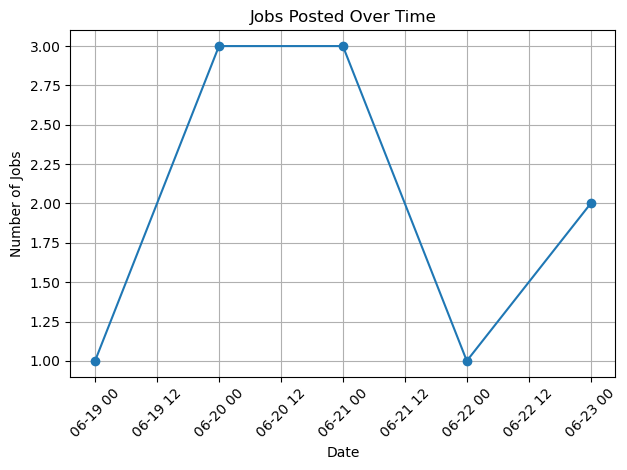

In [35]:
# Convert to datetime
df['Posted Date'] = pd.to_datetime(df['Posted Date'])

# Count jobs per date
date_counts = df['Posted Date'].value_counts().sort_index()

# Plot line chart - Number of Jobs by Posted Date
plt.plot(date_counts.index, date_counts.values, marker='o')
plt.title("Jobs Posted Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Jobs")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

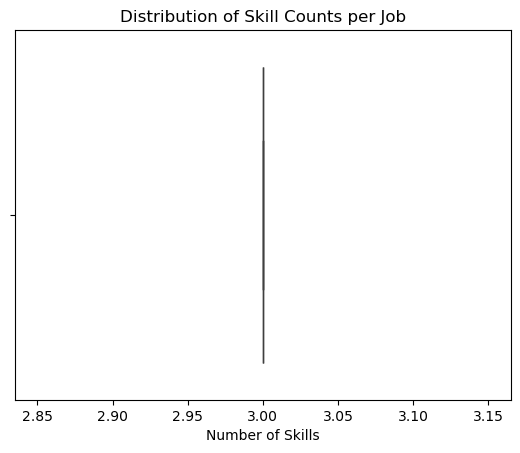

In [36]:
# Count number of skills directly from the list
df['Skill Count'] = df['Skills Mentioned'].apply(len)

# Box plot – Number of Skills Mentioned per Job
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Skill Count'])
plt.title("Distribution of Skill Counts per Job")
plt.xlabel("Number of Skills")
plt.show()

### Visual Trends – Where, When, and What Skills

To understand the data better, simple charts were created to show job locations, posting dates, and how many skills are asked per role.

**What it is found:**

📍 Toronto has the most jobs – The pie chart shows Toronto as the top city for tech roles, followed by Vancouver, Montreal, and Calgary.

📆 Most jobs were posted around June 21,2025 – The line chart shows steady job posting from June 19 to 23, with a small peak on June 21.

📦 Most jobs list 3 skills – The box plot shows that most roles ask for exactly three main skills, showing that employers prefer focused skill sets.

These visuals help job seekers know where to look, when to apply, and what to focus on.